In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
news_data = news_data.drop(['url'], axis=1)

In [3]:
#Usuwanie wartości odstających
Q1 = news_data[' shares'].quantile(0.25)
Q3 = news_data[' shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
fixedData = news_data.drop(news_data[news_data[' shares'] > UTV].index)
fixedData.shape

(35103, 60)

In [4]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,1:-1]
target = fixedData.iloc[1:,-1]
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [5]:
target.head()

1     711
2    1500
3    1200
4     505
5     855
Name:  shares, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler #Standaryzacja danych
scaler = MinMaxScaler() 
data   = scaler.fit_transform(data)
data

array([[0.38888889, 0.03284389, 0.6047431 , ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.02717671, 0.57512955, ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.06839258, 0.5037879 , ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.44444444, 0.05692942, 0.51635516, ..., 0.56818182, 0.09090909,
        0.13636364],
       [0.22222222, 0.08784132, 0.53949331, ..., 0.5       , 1.        ,
        0.        ],
       [0.44444444, 0.02022154, 0.70198678, ..., 0.625     , 0.33333333,
        0.25      ]])

In [7]:
#Siec neuronowa z metodą PCA redukcji wymiarowości
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=40) #Metoda PCA
pca_data = pca.fit(data).transform(data)
pca_data

array([[-0.3555699 ,  0.00866528,  1.23732807, ...,  0.00342306,
         0.01260056,  0.01503903],
       [-0.41505111,  0.34104306,  0.74493274, ..., -0.00501034,
        -0.00948469,  0.01465762],
       [ 0.03223653, -0.39460297, -0.28554368, ...,  0.0114035 ,
        -0.016694  , -0.00609487],
       ...,
       [-0.227935  , -0.34363471, -0.17989547, ...,  0.00802174,
         0.00784163,  0.01420245],
       [ 1.26219197,  0.09502245,  0.18772458, ..., -0.00180843,
         0.00843976,  0.01342379],
       [-0.45036292, -0.71759545, -0.38607578, ...,  0.07241938,
         0.02678224, -0.04323739]])

In [8]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(pca_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (31591, 40)
target_train: (31591,)

Testing dataset:
data_test: (3511, 40)
target_test: (3511,)


In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

news_network = MLPRegressor(solver='adam', alpha=1e-5, 
                     hidden_layer_sizes=(50,50 ),verbose=True, random_state=1, max_iter=5000, tol=1e-7)
news_network.fit(data_train, target_train)

mse =  mean_squared_error(target_test, news_network.predict(data_test))
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Iteration 1, loss = 1987212.89640018
Iteration 2, loss = 1738549.39875476
Iteration 3, loss = 1089896.37714216
Iteration 4, loss = 633931.43299613
Iteration 5, loss = 557853.06478305
Iteration 6, loss = 552492.58208751
Iteration 7, loss = 551401.01446747
Iteration 8, loss = 550787.48514408
Iteration 9, loss = 550309.02630949
Iteration 10, loss = 549844.77758778
Iteration 11, loss = 549469.18365580
Iteration 12, loss = 549157.82828766
Iteration 13, loss = 548851.11188085
Iteration 14, loss = 548469.43451059
Iteration 15, loss = 548163.88597601
Iteration 16, loss = 547841.28538144
Iteration 17, loss = 547663.26601128
Iteration 18, loss = 547379.75714335
Iteration 19, loss = 547096.97099013
Iteration 20, loss = 546868.66267028
Iteration 21, loss = 546668.04852829
Iteration 22, loss = 546359.47672983
Iteration 23, loss = 546188.28813600
Iteration 24, loss = 545862.49505454
Iteration 25, loss = 545775.32321943
Iteration 26, loss = 545486.61818927
Iteration 27, loss = 545232.59551752
Iterati

Iteration 219, loss = 518214.96635616
Iteration 220, loss = 518024.40848105
Iteration 221, loss = 518125.47873799
Iteration 222, loss = 518036.76769114
Iteration 223, loss = 517871.23193845
Iteration 224, loss = 517744.67817840
Iteration 225, loss = 517718.22952917
Iteration 226, loss = 517533.43305501
Iteration 227, loss = 517523.84643218
Iteration 228, loss = 517489.29521079
Iteration 229, loss = 517390.61473744
Iteration 230, loss = 517328.78354751
Iteration 231, loss = 517060.58529473
Iteration 232, loss = 517019.96251257
Iteration 233, loss = 516934.32355068
Iteration 234, loss = 516835.40315898
Iteration 235, loss = 516715.99113665
Iteration 236, loss = 516631.14257367
Iteration 237, loss = 516628.86297632
Iteration 238, loss = 516540.00125190
Iteration 239, loss = 516373.05940188
Iteration 240, loss = 516249.83940172
Iteration 241, loss = 516084.07782320
Iteration 242, loss = 516093.53012432
Iteration 243, loss = 515908.38586106
Iteration 244, loss = 515940.35720252
Iteration 24

Iteration 435, loss = 494309.50171080
Iteration 436, loss = 494374.20702658
Iteration 437, loss = 494155.47098133
Iteration 438, loss = 494026.21242846
Iteration 439, loss = 493942.78778538
Iteration 440, loss = 493933.16037177
Iteration 441, loss = 493748.93096520
Iteration 442, loss = 493572.50113506
Iteration 443, loss = 493561.01530336
Iteration 444, loss = 493638.82184005
Iteration 445, loss = 493225.00273161
Iteration 446, loss = 493339.67099332
Iteration 447, loss = 493115.10027882
Iteration 448, loss = 493016.85087401
Iteration 449, loss = 492874.54001237
Iteration 450, loss = 492963.72203860
Iteration 451, loss = 492710.29025625
Iteration 452, loss = 492659.80998897
Iteration 453, loss = 492479.85197414
Iteration 454, loss = 492882.38691376
Iteration 455, loss = 492339.24373749
Iteration 456, loss = 492283.52479312
Iteration 457, loss = 492376.38432785
Iteration 458, loss = 492127.83318333
Iteration 459, loss = 491959.16839985
Iteration 460, loss = 492144.93779132
Iteration 46

Iteration 651, loss = 478012.32605438
Iteration 652, loss = 477836.21170413
Iteration 653, loss = 477976.18168241
Iteration 654, loss = 477691.28374048
Iteration 655, loss = 477677.55664439
Iteration 656, loss = 477626.64359980
Iteration 657, loss = 477701.42304365
Iteration 658, loss = 477682.75344906
Iteration 659, loss = 477577.67893453
Iteration 660, loss = 477450.59674060
Iteration 661, loss = 477351.46025821
Iteration 662, loss = 477365.44831504
Iteration 663, loss = 477230.58597467
Iteration 664, loss = 477256.33829417
Iteration 665, loss = 477159.64760686
Iteration 666, loss = 477060.58257551
Iteration 667, loss = 476805.08910751
Iteration 668, loss = 476941.57977224
Iteration 669, loss = 476815.62328512
Iteration 670, loss = 476848.73682261
Iteration 671, loss = 476775.61159852
Iteration 672, loss = 476770.95657927
Iteration 673, loss = 476632.00767454
Iteration 674, loss = 476457.52231087
Iteration 675, loss = 476556.89299954
Iteration 676, loss = 476427.44124744
Iteration 67

Iteration 867, loss = 467270.02048135
Iteration 868, loss = 467131.93946331
Iteration 869, loss = 467243.70191031
Iteration 870, loss = 467251.87445171
Iteration 871, loss = 467068.46733284
Iteration 872, loss = 467193.76885595
Iteration 873, loss = 466990.40088324
Iteration 874, loss = 467286.40737648
Iteration 875, loss = 466968.36452757
Iteration 876, loss = 467075.07758264
Iteration 877, loss = 466902.77907837
Iteration 878, loss = 466885.69055631
Iteration 879, loss = 466897.97016086
Iteration 880, loss = 466965.75580521
Iteration 881, loss = 466688.82728656
Iteration 882, loss = 466781.06514235
Iteration 883, loss = 466611.72955734
Iteration 884, loss = 466767.52012602
Iteration 885, loss = 466646.38575825
Iteration 886, loss = 466587.47465243
Iteration 887, loss = 466414.03656621
Iteration 888, loss = 466603.44620680
Iteration 889, loss = 466432.00464508
Iteration 890, loss = 466346.91303501
Iteration 891, loss = 466354.92905940
Iteration 892, loss = 466433.68415414
Iteration 89

Iteration 1081, loss = 459233.62516609
Iteration 1082, loss = 459111.20177329
Iteration 1083, loss = 458980.47771848
Iteration 1084, loss = 459209.25454789
Iteration 1085, loss = 459060.18180306
Iteration 1086, loss = 459112.65045949
Iteration 1087, loss = 459163.83630791
Iteration 1088, loss = 459055.47293263
Iteration 1089, loss = 458997.56875919
Iteration 1090, loss = 458944.02462241
Iteration 1091, loss = 458959.05937520
Iteration 1092, loss = 458737.26898599
Iteration 1093, loss = 458990.43930675
Iteration 1094, loss = 458644.89168427
Iteration 1095, loss = 458874.47335245
Iteration 1096, loss = 458745.82272682
Iteration 1097, loss = 458910.70376638
Iteration 1098, loss = 458542.84894517
Iteration 1099, loss = 458820.88338253
Iteration 1100, loss = 458583.56858419
Iteration 1101, loss = 458599.18736086
Iteration 1102, loss = 458437.60811013
Iteration 1103, loss = 458784.06903358
Iteration 1104, loss = 458703.11253534
Iteration 1105, loss = 458448.45448809
Iteration 1106, loss = 45

Iteration 1292, loss = 453183.05915793
Iteration 1293, loss = 453342.43592135
Iteration 1294, loss = 453186.14028271
Iteration 1295, loss = 453369.49230676
Iteration 1296, loss = 453254.99996358
Iteration 1297, loss = 453216.72740798
Iteration 1298, loss = 453180.25472205
Iteration 1299, loss = 453229.43807442
Iteration 1300, loss = 453114.50727635
Iteration 1301, loss = 453160.75886532
Iteration 1302, loss = 452900.85312063
Iteration 1303, loss = 453109.19492174
Iteration 1304, loss = 453004.57725462
Iteration 1305, loss = 453091.71807279
Iteration 1306, loss = 452839.33760438
Iteration 1307, loss = 453111.97814974
Iteration 1308, loss = 452922.57511530
Iteration 1309, loss = 452977.93356230
Iteration 1310, loss = 452775.21072044
Iteration 1311, loss = 452787.74992904
Iteration 1312, loss = 452829.11049791
Iteration 1313, loss = 452761.15702899
Iteration 1314, loss = 452808.26781875
Iteration 1315, loss = 452717.63533628
Iteration 1316, loss = 452681.44170953
Iteration 1317, loss = 45

In [10]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, news_network.predict(data_test)))

Variance score: 0.04


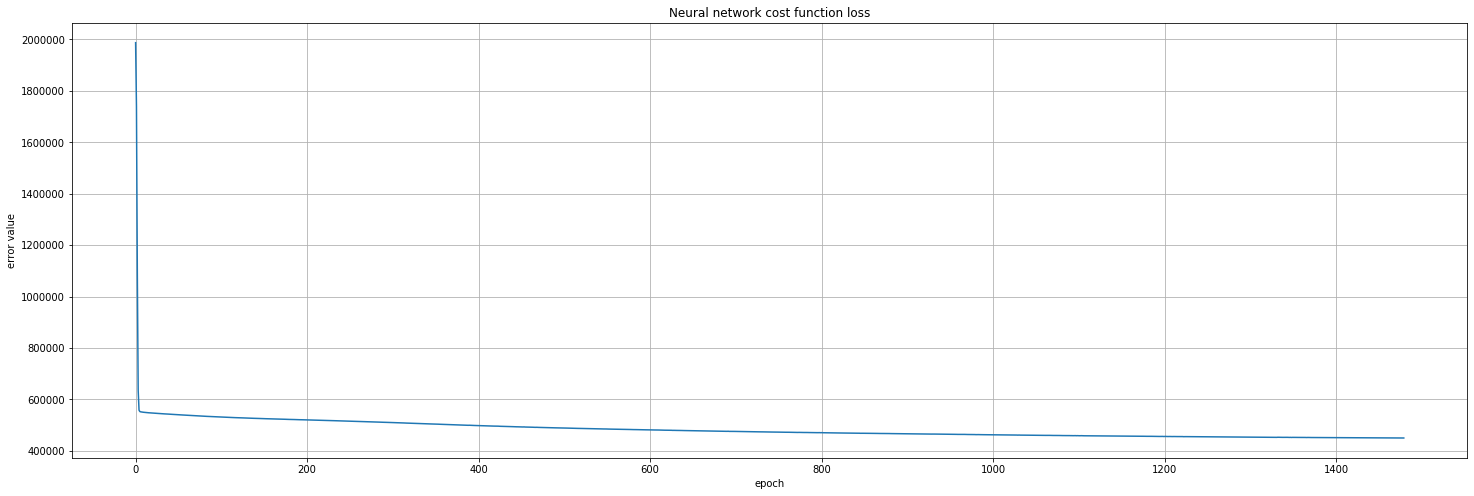

In [19]:
import matplotlib.pyplot as plt
plt.plot(news_network.loss_curve_)
plt.title('Neural network cost function loss')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =25.0
fig_size[1] = 8.0
plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

Wykres predykcji


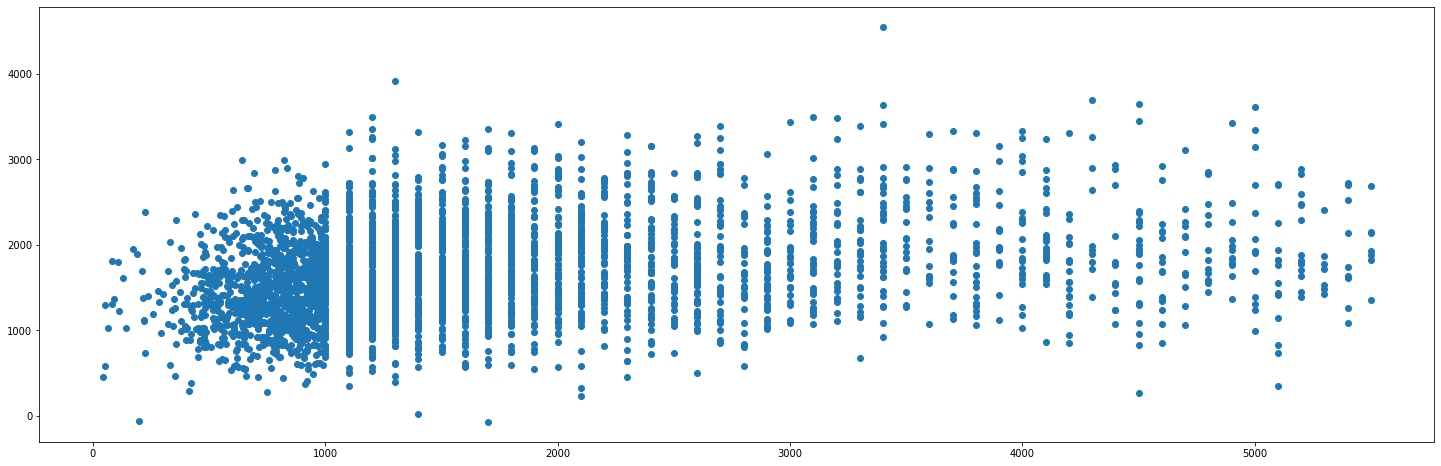

In [21]:
#WYKRES PREDYKCJI
plt.scatter(target_test, news_network.predict(data_test))
print("Wykres predykcji")


In [22]:
df_someXdata = pd.DataFrame(news_network.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(11)

,Actual shares,Predicted shares
0,1200,1383.360436
1,1300,2140.884167
2,2300,1541.378543
3,666,1717.060181
4,2700,2275.377166
5,672,1721.040722
6,1300,1518.914322
7,926,422.230086
8,863,1676.597112
9,3200,2169.052921


In [23]:
#---------------------------------------------------------------------------------------------------------------
#Sieć neuronowa z metodą Truncated SVD

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=40)
svd_data = svd.fit(data).transform(data)
svd_data

array([[ 2.62380645e+00, -3.59791695e-01,  1.80595976e-02, ...,
        -3.45782800e-02,  9.76181101e-03,  3.36542123e-02],
       [ 2.64174482e+00, -4.09553008e-01,  3.46061020e-01, ...,
        -5.09107673e-02,  3.46354213e-02,  3.92973989e-02],
       [ 2.52533696e+00,  1.56369873e-02, -3.75860086e-01, ...,
        -3.52500294e-02,  4.26108219e-02,  1.47346054e-02],
       ...,
       [ 2.64297466e+00, -2.43103717e-01, -3.17757782e-01, ...,
         1.92720297e-03, -2.95914050e-03,  1.72849506e-02],
       [ 2.79065900e+00,  1.26401592e+00,  6.93369283e-02, ...,
        -2.88792439e-03, -7.21438615e-03,  1.49905705e-02],
       [ 2.93083338e+00, -4.60547368e-01, -7.12926682e-01, ...,
         7.90801044e-02, -2.07259006e-02, -4.40663438e-02]])

In [24]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(svd_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (31591, 40)
target_train: (31591,)

Testing dataset:
data_test: (3511, 40)
target_test: (3511,)


In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

news_network = MLPRegressor(solver='adam', alpha=1e-5, 
                     hidden_layer_sizes=(50,50 ),verbose=True, random_state=1, max_iter=5000, tol=1e-7)
news_network.fit(data_train, target_train)

mse =  mean_squared_error(target_test, news_network.predict(data_test))
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Iteration 1, loss = 1960416.07693202
Iteration 2, loss = 1452617.08908632
Iteration 3, loss = 670904.94973227
Iteration 4, loss = 553919.70508512
Iteration 5, loss = 551641.70431934
Iteration 6, loss = 550789.15499289
Iteration 7, loss = 550139.65172044
Iteration 8, loss = 549811.24823360
Iteration 9, loss = 549575.74804876
Iteration 10, loss = 549438.17092704
Iteration 11, loss = 549307.55922344
Iteration 12, loss = 549156.78500109
Iteration 13, loss = 549086.70494190
Iteration 14, loss = 549114.51340081
Iteration 15, loss = 549117.04152606
Iteration 16, loss = 549029.10703753
Iteration 17, loss = 549073.55183873
Iteration 18, loss = 548995.40820292
Iteration 19, loss = 548935.53872660
Iteration 20, loss = 548996.01535423
Iteration 21, loss = 548945.34292598
Iteration 22, loss = 548937.38742514
Iteration 23, loss = 548954.60919128
Iteration 24, loss = 548966.27243405
Iteration 25, loss = 548826.16758178
Iteration 26, loss = 548904.76638148
Iteration 27, loss = 548885.32263744
Iteratio

In [26]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, news_network.predict(data_test)))

Variance score: 0.10


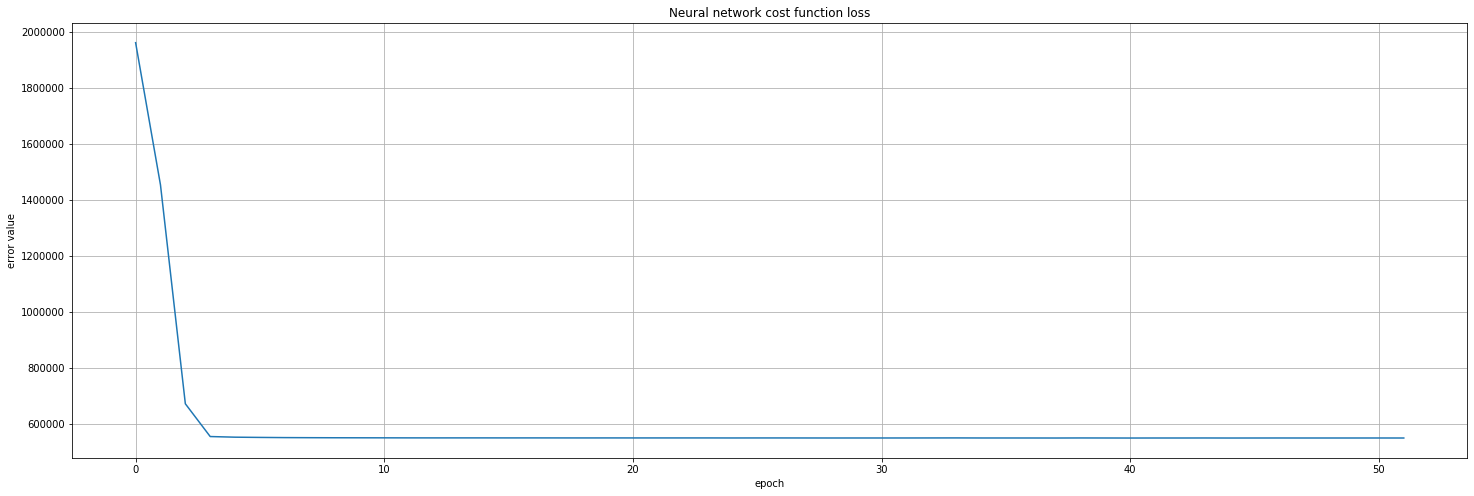

In [28]:
import matplotlib.pyplot as plt
plt.plot(news_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

Wykres predykcji


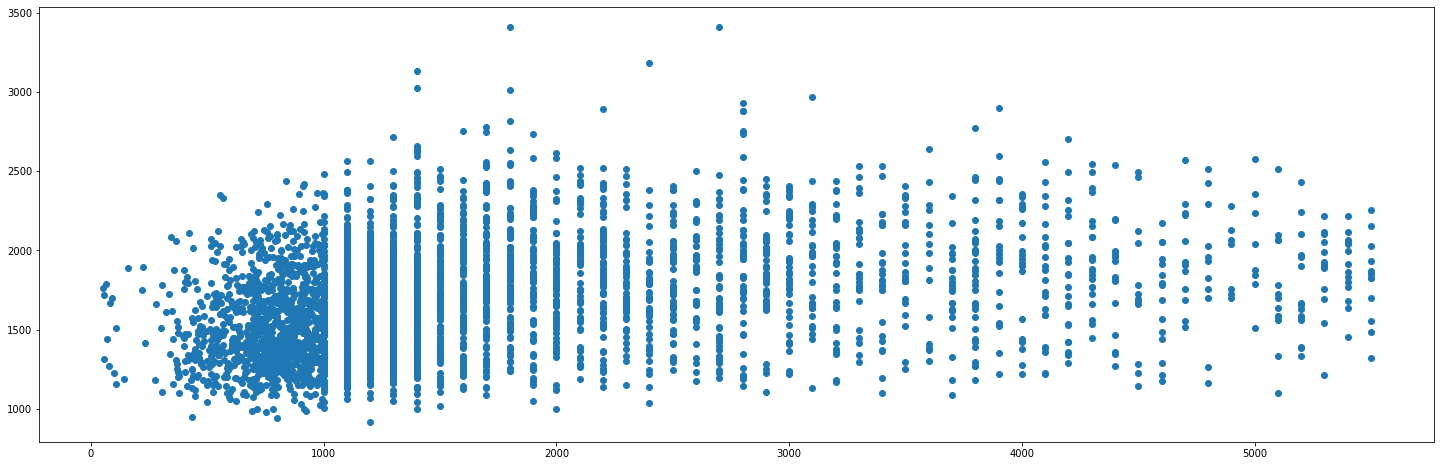

In [29]:
#WYKRES PREDYKCJI
plt.scatter(target_test, news_network.predict(data_test))
print("Wykres predykcji")


In [30]:
df_someXdata = pd.DataFrame(news_network.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(11)

,Actual shares,Predicted shares
0,1100,1362.050707
1,4000,1858.232394
2,1800,1499.385193
3,1500,2288.851678
4,919,1060.608535
5,1700,1868.228465
6,786,2101.142181
7,3000,2097.133840
8,2300,1717.562077
9,879,1530.113559
